In [204]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from random import sample
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import cKDTree

In [220]:
seed = 903492563
np.random.seed(seed)
random.seed(seed)

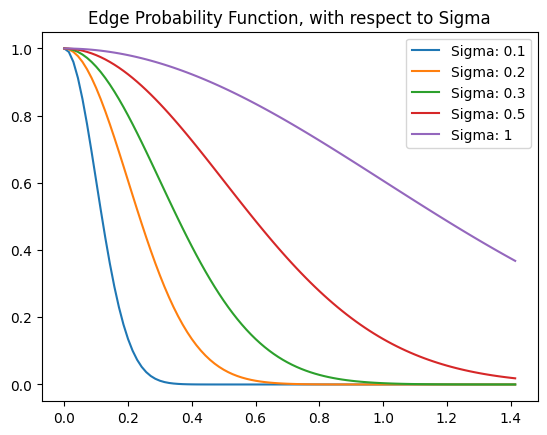

In [120]:
def edge_prob(x, sigma):
    return np.exp(-np.power(x, 2) / (2 * np.power(sigma, 2)))
x = np.linspace(0, np.sqrt(2), 100)
for sigma in [0.1, 0.2, 0.3, 0.5, 1]:
  plt.plot(x, edge_prob(x, sigma), label=f"Sigma: {sigma}")
plt.title(f"Edge Probability Function, with respect to Sigma")
plt.legend()
plt.show()

In [161]:
def edge_prob_fixed(x):
    sigma = 0.1002
    return np.exp(-np.power(x, 2) / (2 * np.power(sigma, 2)))

In [162]:
n = 500
r = np.sqrt(2)
p = {i: (random.uniform(0, 1), random.uniform(0, 1)) for i in range(n)}
iterations = 100

In [166]:
soft_RGG_edges = np.zeros((iterations))
for i in tqdm(range(iterations)):
  np.random.seed(i)
  random.seed(i)
  soft_RGG = nx.soft_random_geometric_graph(n, r, dim=2, p_dist=edge_prob_fixed, pos=p, seed=i)
  soft_RGG_edges[i] = soft_RGG.number_of_edges()
print("Average Num of edges: ", soft_RGG_edges.mean())

100%|██████████| 100/100 [02:08<00:00,  1.28s/it]

Average Num of edges:  6740.44


In [168]:
print(soft_RGG_edges)

[6711. 6828. 6706. 6729. 6698. 6834. 6691. 6732. 6758. 6686. 6705. 6801.
 6803. 6763. 6707. 6782. 6724. 6753. 6690. 6716. 6722. 6710. 6750. 6698.
 6761. 6749. 6791. 6690. 6793. 6710. 6800. 6719. 6720. 6784. 6661. 6847.
 6837. 6726. 6775. 6677. 6772. 6702. 6614. 6699. 6632. 6752. 6779. 6799.
 6726. 6698. 6705. 6789. 6795. 6738. 6728. 6689. 6740. 6696. 6788. 6669.
 6844. 6821. 6754. 6750. 6798. 6591. 6688. 6770. 6777. 6678. 6765. 6755.
 6792. 6788. 6759. 6759. 6768. 6686. 6767. 6659. 6788. 6681. 6734. 6746.
 6711. 6668. 6701. 6812. 6743. 6792. 6751. 6704. 6766. 6723. 6803. 6755.
 6599. 6821. 6771. 6759.]


In [170]:
g_np_edges = np.zeros((iterations))
for i in tqdm(range(iterations)):
  np.random.seed(i)
  random.seed(i)
  g_np = nx.erdos_renyi_graph(n, p=0.0540316832, seed=i)
  g_np_edges[i] = g_np.number_of_edges()
print("Average Num of edges: ", g_np_edges.mean())


100%|██████████| 100/100 [00:03<00:00, 25.94it/s]

Average Num of edges:  6746.46


In [171]:
print(g_np_edges)

[6805. 6720. 6727. 6779. 6739. 6716. 6787. 6720. 6836. 6763. 6659. 6772.
 6664. 6826. 6683. 6662. 6724. 6829. 6789. 6690. 6800. 6739. 6693. 6772.
 6828. 6749. 6837. 6790. 6849. 6698. 6884. 6817. 6805. 6857. 6673. 6789.
 6745. 6612. 6802. 6899. 6704. 6798. 6687. 6670. 6673. 6745. 6741. 6752.
 6702. 6792. 6628. 6687. 6749. 6651. 6691. 6686. 6677. 6659. 6678. 6684.
 6730. 6653. 6742. 6786. 6760. 6763. 6743. 6814. 6741. 6800. 6883. 6836.
 6795. 6703. 6717. 6717. 6681. 6769. 6651. 6665. 6815. 6761. 6687. 6713.
 6653. 6872. 6784. 6834. 6767. 6895. 6861. 6791. 6761. 6716. 6809. 6710.
 6555. 6780. 6649. 6702.]


In [172]:
soft_RGG = nx.soft_random_geometric_graph(n, r, dim=2, p_dist=edge_prob_fixed, pos=p, seed=seed)
g_np = nx.erdos_renyi_graph(n, p=0.0540316832, seed=seed)

In [176]:
print(soft_RGG.number_of_edges())
print(g_np.number_of_edges())

6651
6745


In [227]:
def plot_neurons(graph, title, node_size=5, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    nx.draw(graph, p, node_size=node_size)
    ax.set_axis_on()
    plt.axhline(y=1, color='red')
    plt.axvline(x=1, color='red')
    plt.axhline(y=0, color='red')
    plt.axvline(x=0, color='red')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

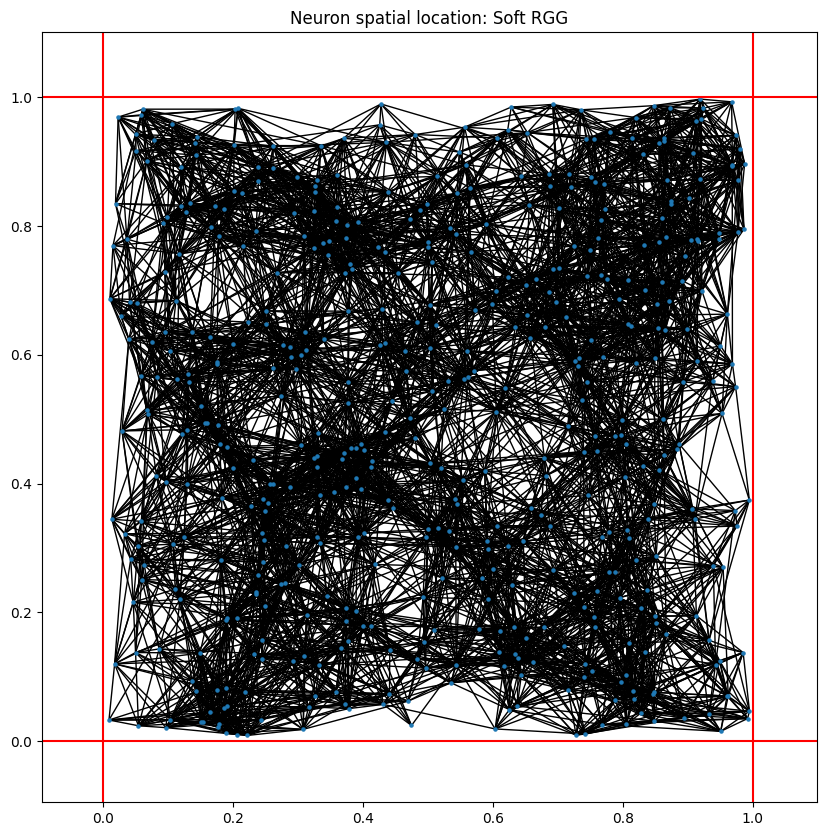

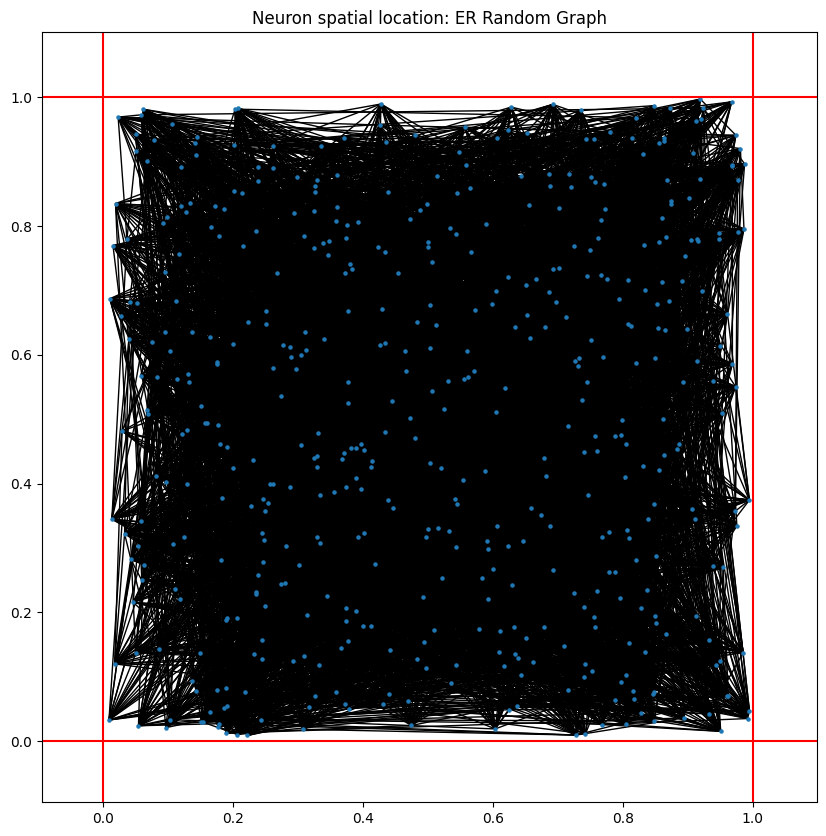

In [174]:
plot_neurons(soft_RGG, "Neuron spatial location: Soft RGG")
plot_neurons(g_np, "Neuron spatial location: ER Random Graph")

In [206]:
# prompt: convert p into a 2d coordinate matrix
coordinate_matrix = np.zeros((n, 2))
for idx, (x, y) in enumerate(p.values()):
  coordinate_matrix[idx] = [x, y]
dist_matrix = euclidean_distances(coordinate_matrix, coordinate_matrix)
print(dist_matrix.shape)

(500, 500)


In [214]:
four_closest = np.argpartition(dist_matrix, 4)[:,:5][152]
print(four_closest)

[133 152 443 398  71]


In [233]:
closest = [133, 443, 398, 152]

In [243]:
coordinate_matrix = np.zeros((5, 2))
for idx, node_idx in enumerate(four_closest):
  print(f" Node: {node_idx}")
  coordinate_matrix[idx] = p[node_idx]
print(coordinate_matrix)
dist_matrix = euclidean_distances(coordinate_matrix, coordinate_matrix)
print(dist_matrix)

 Node: 133
 Node: 152
 Node: 443
 Node: 398
 Node: 71
[[0.69207037 0.7334758 ]
 [0.70194641 0.73421768]
 [0.66675261 0.71761641]
 [0.6857789  0.69753527]
 [0.72490962 0.76855758]]
[[0.         0.00990387 0.0298749  0.03648705 0.04805359]
 [0.00990387 0.         0.0389128  0.04008725 0.04131026]
 [0.0298749  0.0389128  0.         0.02766318 0.07731262]
 [0.03648705 0.04008725 0.02766318 0.         0.08108872]
 [0.04805359 0.04131026 0.07731262 0.08108872 0.        ]]


In [246]:
soft_RGG_subgraph = soft_RGG.subgraph(four_closest)
g_np_subgraph = g_np.subgraph(four_closest)

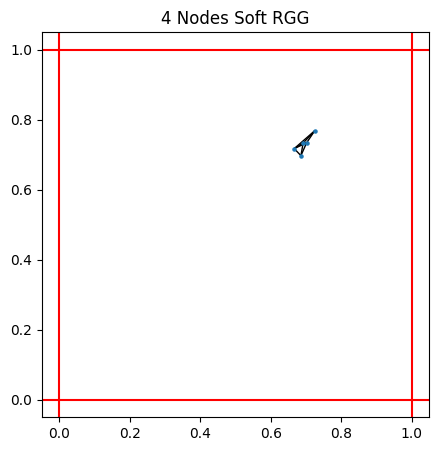

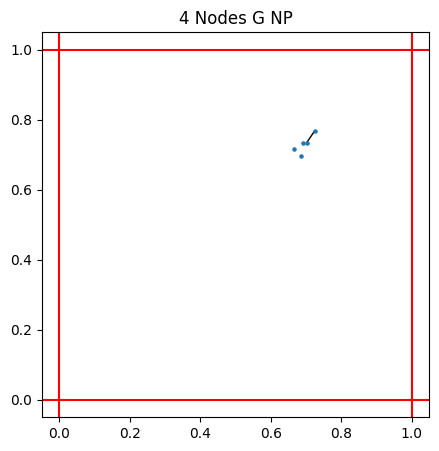

In [247]:
plot_neurons(soft_RGG_subgraph, "4 Nodes Soft RGG", node_size=5, figsize=(5, 5))
plot_neurons(g_np_subgraph, "4 Nodes G NP", node_size=5, figsize=(5, 5))

In [248]:
for n, d in soft_RGG_subgraph.degree():
  print(f"Node: {n}, Degree: {d}")
for n, d in g_np_subgraph.degree():
  print(f"Node: {n}, Degree: {d}")

Node: 133, Degree: 4
Node: 71, Degree: 3
Node: 398, Degree: 3
Node: 152, Degree: 4
Node: 443, Degree: 4
Node: 133, Degree: 0
Node: 71, Degree: 1
Node: 398, Degree: 0
Node: 152, Degree: 1
Node: 443, Degree: 0
